#Predicting Heart Disease with overlooked labels

Using logistic regression to aid in the prediction of heart disease. I will be reviewing BMI, Age Category, Race, SleepTime, Physical Health, Mental Health to see how it relates to Heart disease.

Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount

## Step 0: Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Step 1: Load Data

Run the following command will load the **heart_2020_cleaned.csv** to your DataFrame

In [ ]:
data=pd.read_csv('heart_2020_cleaned.csv')


In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Step 2: Pre-process data 
Check to see if data has gaps Nulls, N/A, None. Do you have anomalies (Outliers?
Analyze the label (e.g., in classification, check to see if data is balanced)
Encode columns that contains text
Normalize numerical columns

In [ ]:
null_values = data.isnull()
print(null_values.sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
data.drop(["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Diabetic", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"], axis=1, inplace=True)

In [ ]:
label_counts = data['HeartDisease'].value_counts()
# check if the data is balanced
if label_counts.min() == label_counts.max():
    print('The data is balanced.')
else:
    print('The data is imbalanced.')

The data is imbalanced.


In [ ]:
#Encoding
#objects that are non numeric
cat_features = []
#objects that are numeric
num_features = []
for column, i in zip(data.columns, data.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

df_cat = data[cat_features].copy()
df_num = data[num_features].copy()

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)


In [ ]:
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53005 entries, 0 to 53004
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      53005 non-null  float64
 1   AgeCategory       53005 non-null  float64
 2   Race              53005 non-null  float64
 3   PhysicalActivity  53005 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [ ]:
# create a StandardScaler
scaler = StandardScaler()

df_num = data[num_features].copy()

df_num_scaler = scaler.fit_transform(df_num)

df_num_scaler = pd.DataFrame(df_num_scaler, columns = num_features)

df_num_scaler
# fit the scaler to the data #BMI', 'AgeCategory', 'Race', 'SleepTime', 'PhysicalHealth', 'MentalHealth
# scaler.fit(data[['HeartDisease', 'BMI', 'AgeCategory', 'Race', 'SleepTime', 'PhysicalHealth', 'MentalHealth']])

# # transform the data
# df_scaled = scaler.transform(data[['HeartDisease', 'BMI', 'AgeCategory', 'Race', 'SleepTime', 'PhysicalHealth', 'MentalHealth']])

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.813908,-0.071146,3.224855,-1.402936
1,-1.219394,-0.439379,-0.501187,-0.082811
2,-0.227478,2.015511,3.224855,0.577251
3,-0.604215,-0.439379,-0.501187,-0.742874
4,-0.683696,2.997468,-0.501187,0.577251
...,...,...,...,...
53000,-0.917368,3.242957,-0.501187,0.577251
53001,-1.282978,-0.439379,-0.501187,0.577251
53002,0.789872,-0.439379,-0.376986,0.577251
53003,-0.467509,-0.439379,0.740827,-0.082811


In [ ]:
data.head(10)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,PhysicalActivity,SleepTime
0,No,16.60,3.0,30.0,55-59,White,Yes,5.0
1,No,20.34,0.0,0.0,80 or older,White,Yes,7.0
2,No,26.58,20.0,30.0,65-69,White,Yes,8.0
3,No,24.21,0.0,0.0,75-79,White,No,6.0
4,No,23.71,28.0,0.0,40-44,White,Yes,8.0
5,Yes,28.87,6.0,0.0,75-79,Black,No,12.0
6,No,21.63,15.0,0.0,70-74,White,Yes,4.0
7,No,31.64,5.0,0.0,80 or older,White,No,9.0
8,No,26.45,0.0,0.0,80 or older,White,No,5.0
9,No,40.69,0.0,0.0,65-69,White,Yes,10.0


In [ ]:
#Merge new dataframe with numeric features to create new numeric dataframe
df_numeric_scaler = pd.merge(df_cat_encoded, df_num_scaler,left_index=True, right_index=True)
df_numeric_scaler.head(10)

,HeartDisease,AgeCategory,Race,PhysicalActivity,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,7.0,5.0,1.0,-1.813908,-0.071146,3.224855,-1.402936
1,0.0,12.0,5.0,1.0,-1.219394,-0.439379,-0.501187,-0.082811
2,0.0,9.0,5.0,1.0,-0.227478,2.015511,3.224855,0.577251
3,0.0,11.0,5.0,0.0,-0.604215,-0.439379,-0.501187,-0.742874
4,0.0,4.0,5.0,1.0,-0.683696,2.997468,-0.501187,0.577251
5,1.0,11.0,2.0,0.0,0.136543,0.297088,-0.501187,3.217501
6,0.0,10.0,5.0,1.0,-1.014334,1.401789,-0.501187,-2.062999
7,0.0,12.0,5.0,0.0,0.576865,0.174343,-0.501187,1.237314
8,0.0,12.0,5.0,0.0,-0.248143,-0.439379,-0.501187,-1.402936
9,0.0,9.0,5.0,1.0,2.015461,-0.439379,-0.501187,1.897376


In [ ]:
values = data['MentalHealth'].unique()

# loop over the values
for value in values:
  # get the type of the value
  value_type = type(value)
  
  # print the value and its type
  print(f'Value: {value}, Type: {value_type}')

Value: 30.0, Type: <class 'numpy.float64'>
Value: 0.0, Type: <class 'numpy.float64'>
Value: 2.0, Type: <class 'numpy.float64'>
Value: 5.0, Type: <class 'numpy.float64'>
Value: 15.0, Type: <class 'numpy.float64'>
Value: 8.0, Type: <class 'numpy.float64'>
Value: 4.0, Type: <class 'numpy.float64'>
Value: 3.0, Type: <class 'numpy.float64'>
Value: 10.0, Type: <class 'numpy.float64'>
Value: 14.0, Type: <class 'numpy.float64'>
Value: 20.0, Type: <class 'numpy.float64'>
Value: 1.0, Type: <class 'numpy.float64'>
Value: 7.0, Type: <class 'numpy.float64'>
Value: 24.0, Type: <class 'numpy.float64'>
Value: 9.0, Type: <class 'numpy.float64'>
Value: 28.0, Type: <class 'numpy.float64'>
Value: 16.0, Type: <class 'numpy.float64'>
Value: 12.0, Type: <class 'numpy.float64'>
Value: 6.0, Type: <class 'numpy.float64'>
Value: 25.0, Type: <class 'numpy.float64'>
Value: 17.0, Type: <class 'numpy.float64'>
Value: 18.0, Type: <class 'numpy.float64'>
Value: 21.0, Type: <class 'numpy.float64'>
Value: 29.0, Type: <c

In [ ]:
values = df_numeric_scaler['MentalHealth'].unique()

# loop over the values
for value in values:
  # get the type of the value
  value_type = type(value)
  
  # print the value and its type
  print(f'Value: {value}, Type: {value_type}')

  #0, 1, 3, 5, 7, 9, 11
  #"18-24", "25-29", 35-39", "45-49", "55-59","65-69", "75-79"

  #0,1,2,3,4,5
  #'American Indian', 'Black', 'Hispanic', 'Other', 'White'

#Sleep
#-5 -2.5 0 2.5 5 7.5 10 12.5
#1, 4, 8, 9, 15, 18, 22, 24


-2, 0, 2, 4, 6, 8, 10 #BMI.   
-1, 0, 1, 2, 3 #Physical.  --> 0, 6, 12, 18, 24, 30
-1, 0, 1, 2, 3 #Mental --> 0, 6, 12, 18, 24, 30

Value: 3.224854912699556, Type: <class 'numpy.float64'>
Value: -0.5011874335353118, Type: <class 'numpy.float64'>
Value: -0.2527846104529872, Type: <class 'numpy.float64'>
Value: 0.11981962417049957, Type: <class 'numpy.float64'>
Value: 1.361833739582122, Type: <class 'numpy.float64'>
Value: 0.49242385879398637, Type: <class 'numpy.float64'>
Value: -0.0043817873706626966, Type: <class 'numpy.float64'>
Value: -0.12858319891182496, Type: <class 'numpy.float64'>
Value: 0.740826681876311, Type: <class 'numpy.float64'>
Value: 1.2376323280409598, Type: <class 'numpy.float64'>
Value: 1.9828407972879336, Type: <class 'numpy.float64'>
Value: -0.3769860219941495, Type: <class 'numpy.float64'>
Value: 0.3682224472528241, Type: <class 'numpy.float64'>
Value: 2.4796464434525824, Type: <class 'numpy.float64'>
Value: 0.6166252703351487, Type: <class 'numpy.float64'>
Value: 2.9764520896172315, Type: <class 'numpy.float64'>
Value: 1.4860351511232845, Type: <class 'numpy.float64'>
Value: 0.98922950495863

(-1, 0, 1, 2, 3)

In [ ]:
df_numeric_scaler.corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.237085
PhysicalHealth      0.177333
BMI                 0.048756
Race                0.046426
MentalHealth        0.026908
SleepTime           0.012083
PhysicalActivity   -0.104384
Name: HeartDisease, dtype: float64

In [ ]:
features = data.columns
features

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'Race', 'PhysicalActivity', 'SleepTime'],
      dtype='object')

# Step 3: Data Visualization

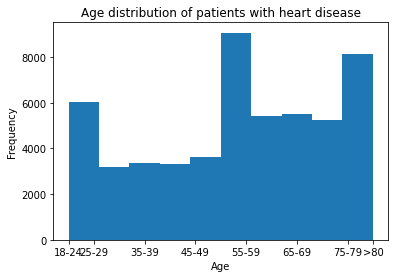

In [ ]:
plt.hist(df_numeric_scaler['AgeCategory'])
plt.xlabel('Age')
plt.xticks(ticks=[0,1, 3, 5, 7, 9, 11, 12], labels=['18-24', '25-29', '35-39', '45-49', '55-59','65-69', '75-79', '>80'])
plt.ylabel('Frequency')
plt.title('Age distribution of patients with heart disease')
plt.show()

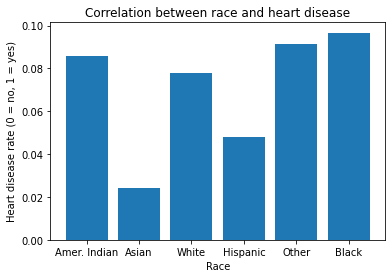

In [ ]:
#Visual graph showing relation of race and heart disease 

#compute the average heart disease rate for each race group
avg_heart_disease_by_race = df_numeric_scaler.groupby('Race')['HeartDisease'].mean()

plt.bar(avg_heart_disease_by_race.index, avg_heart_disease_by_race.values)
plt.xlabel('Race')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Amer. Indian', 'Asian', 'White', 'Hispanic', 'Other', 'Black'])
plt.ylabel('Heart disease rate (0 = no, 1 = yes)')
plt.title('Correlation between race and heart disease')
plt.show()



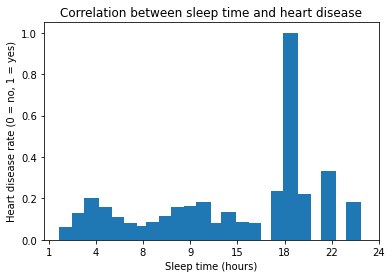

In [ ]:
# compute the average heart disease rate for each sleep time group
avg_heart_disease_by_sleep_time = df_numeric_scaler.groupby('SleepTime')['HeartDisease'].mean()
# create a bar chart of the average heart disease rate by sleep time
plt.bar(avg_heart_disease_by_sleep_time.index, avg_heart_disease_by_sleep_time.values)
plt.xlabel('Sleep time (hours)')
plt.xticks(ticks=[-5, -2.5, 0, 2.5, 5, 7.5, 10, 12.5], labels=['1', '4', '8', '9', '15', '18', '22', '24'])
#-5 -2.5 0 2.5 5 7.5 10 12.5
#1, 4, 8, 9, 15, 18, 22, 24
plt.ylabel('Heart disease rate (0 = no, 1 = yes)')
plt.title('Correlation between sleep time and heart disease')
plt.show()



In [ ]:
# compute the correlation coefficient between the "sleep_time" and "heart_disease" columns
corr = df_numeric_scaler[['SleepTime', 'HeartDisease']].corr()

# print the correlation coefficient
print(f'Correlation coefficient: {corr}')

# compute the average heart disease rate for each sleep time group
avg_heart_disease_by_sleep_time = df_numeric_scaler.groupby('SleepTime')['HeartDisease'].mean()

# find the sleep time group with the lowest heart disease rate
optimal_sleep_time = avg_heart_disease_by_sleep_time.idxmin()

# print the optimal sleep time
print(f'The optimal sleep time for avoiding heart disease is {optimal_sleep_time} hours.')

# compute the average heart disease rate for each mental health group
avg_heart_disease_by_mental_health = df_numeric_scaler.groupby('MentalHealth')['HeartDisease'].mean()

# find the mental health group with the lowest heart disease rate
optimal_mental_health = avg_heart_disease_by_mental_health.idxmin()

# print the optimal mental health
print(f'The optimal mental health for avoiding heart disease is {optimal_mental_health}.')

Correlation coefficient:               SleepTime  HeartDisease
SleepTime      1.000000      0.012083
HeartDisease   0.012083      1.000000
The optimal sleep time for avoiding heart disease is 6.517813698942714 hours.
The optimal mental health for avoiding heart disease is 2.35544503191142.


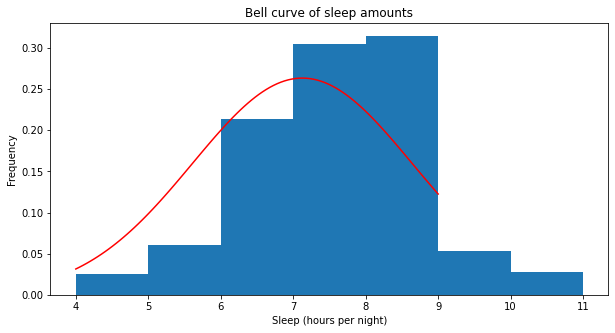

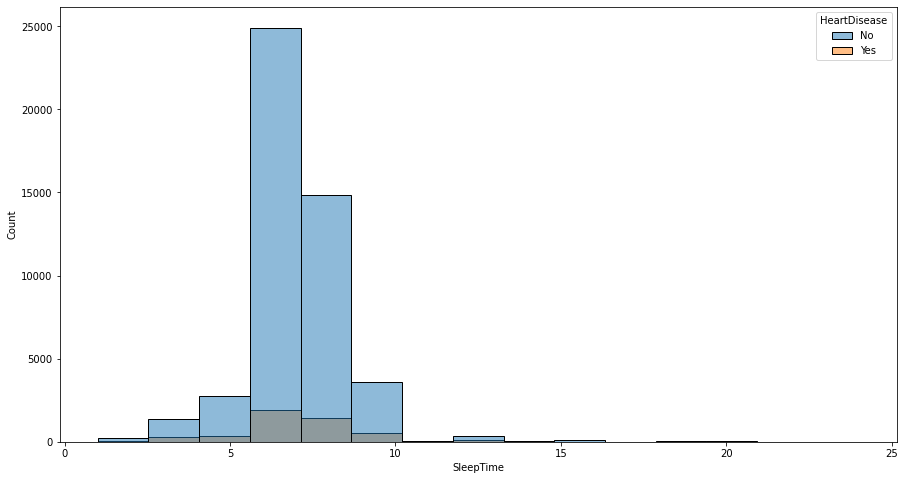

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Create the histogram
plt.hist(data['SleepTime'], bins=np.arange(4, 12), density=True)
# Add a bell curve line
mean = np.mean(data['SleepTime'])
std = np.std(data['SleepTime'])
x = np.linspace(4, 9, 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, 'r')

# Add labels and title
plt.xlabel('Sleep (hours per night)')
plt.ylabel('Frequency')
plt.title('Bell curve of sleep amounts')

# Show the plot
plt.show()


#This bell curve shows us the sleep amount, provided previously the optimal sleep time for avoiding heart disease is 9.68 hours. As we can
#see in the bell curve going past that amount shows a decline. We can see in the second graph that heart disease is prevalent in majority of individuals
#who sleep less. 

fig,axes = plt.subplots(figsize=(15,8))
sns.histplot(ax=axes,bins =15, data=data.sort_values(by="SleepTime"), x="SleepTime", hue="HeartDisease")
plt.show()

# Step 4: Problem Statement

The problem I am trying to solve is regression, my label is column HeartDisease and my features are BMI, AgeCategory, Race, SleepTime, PhysicalHealth, and MentalHealth. My evaluation metrice will be be MSE

Looking at overlooked heart disease indicators, like lack of sleep or race type, how do these indicators play out when it comes to predicting heart disease?  What is the optimal mental health and sleep time necessary to be in good standing for avoiding heart disease? 

# Step 5: Features Selection/Extraction



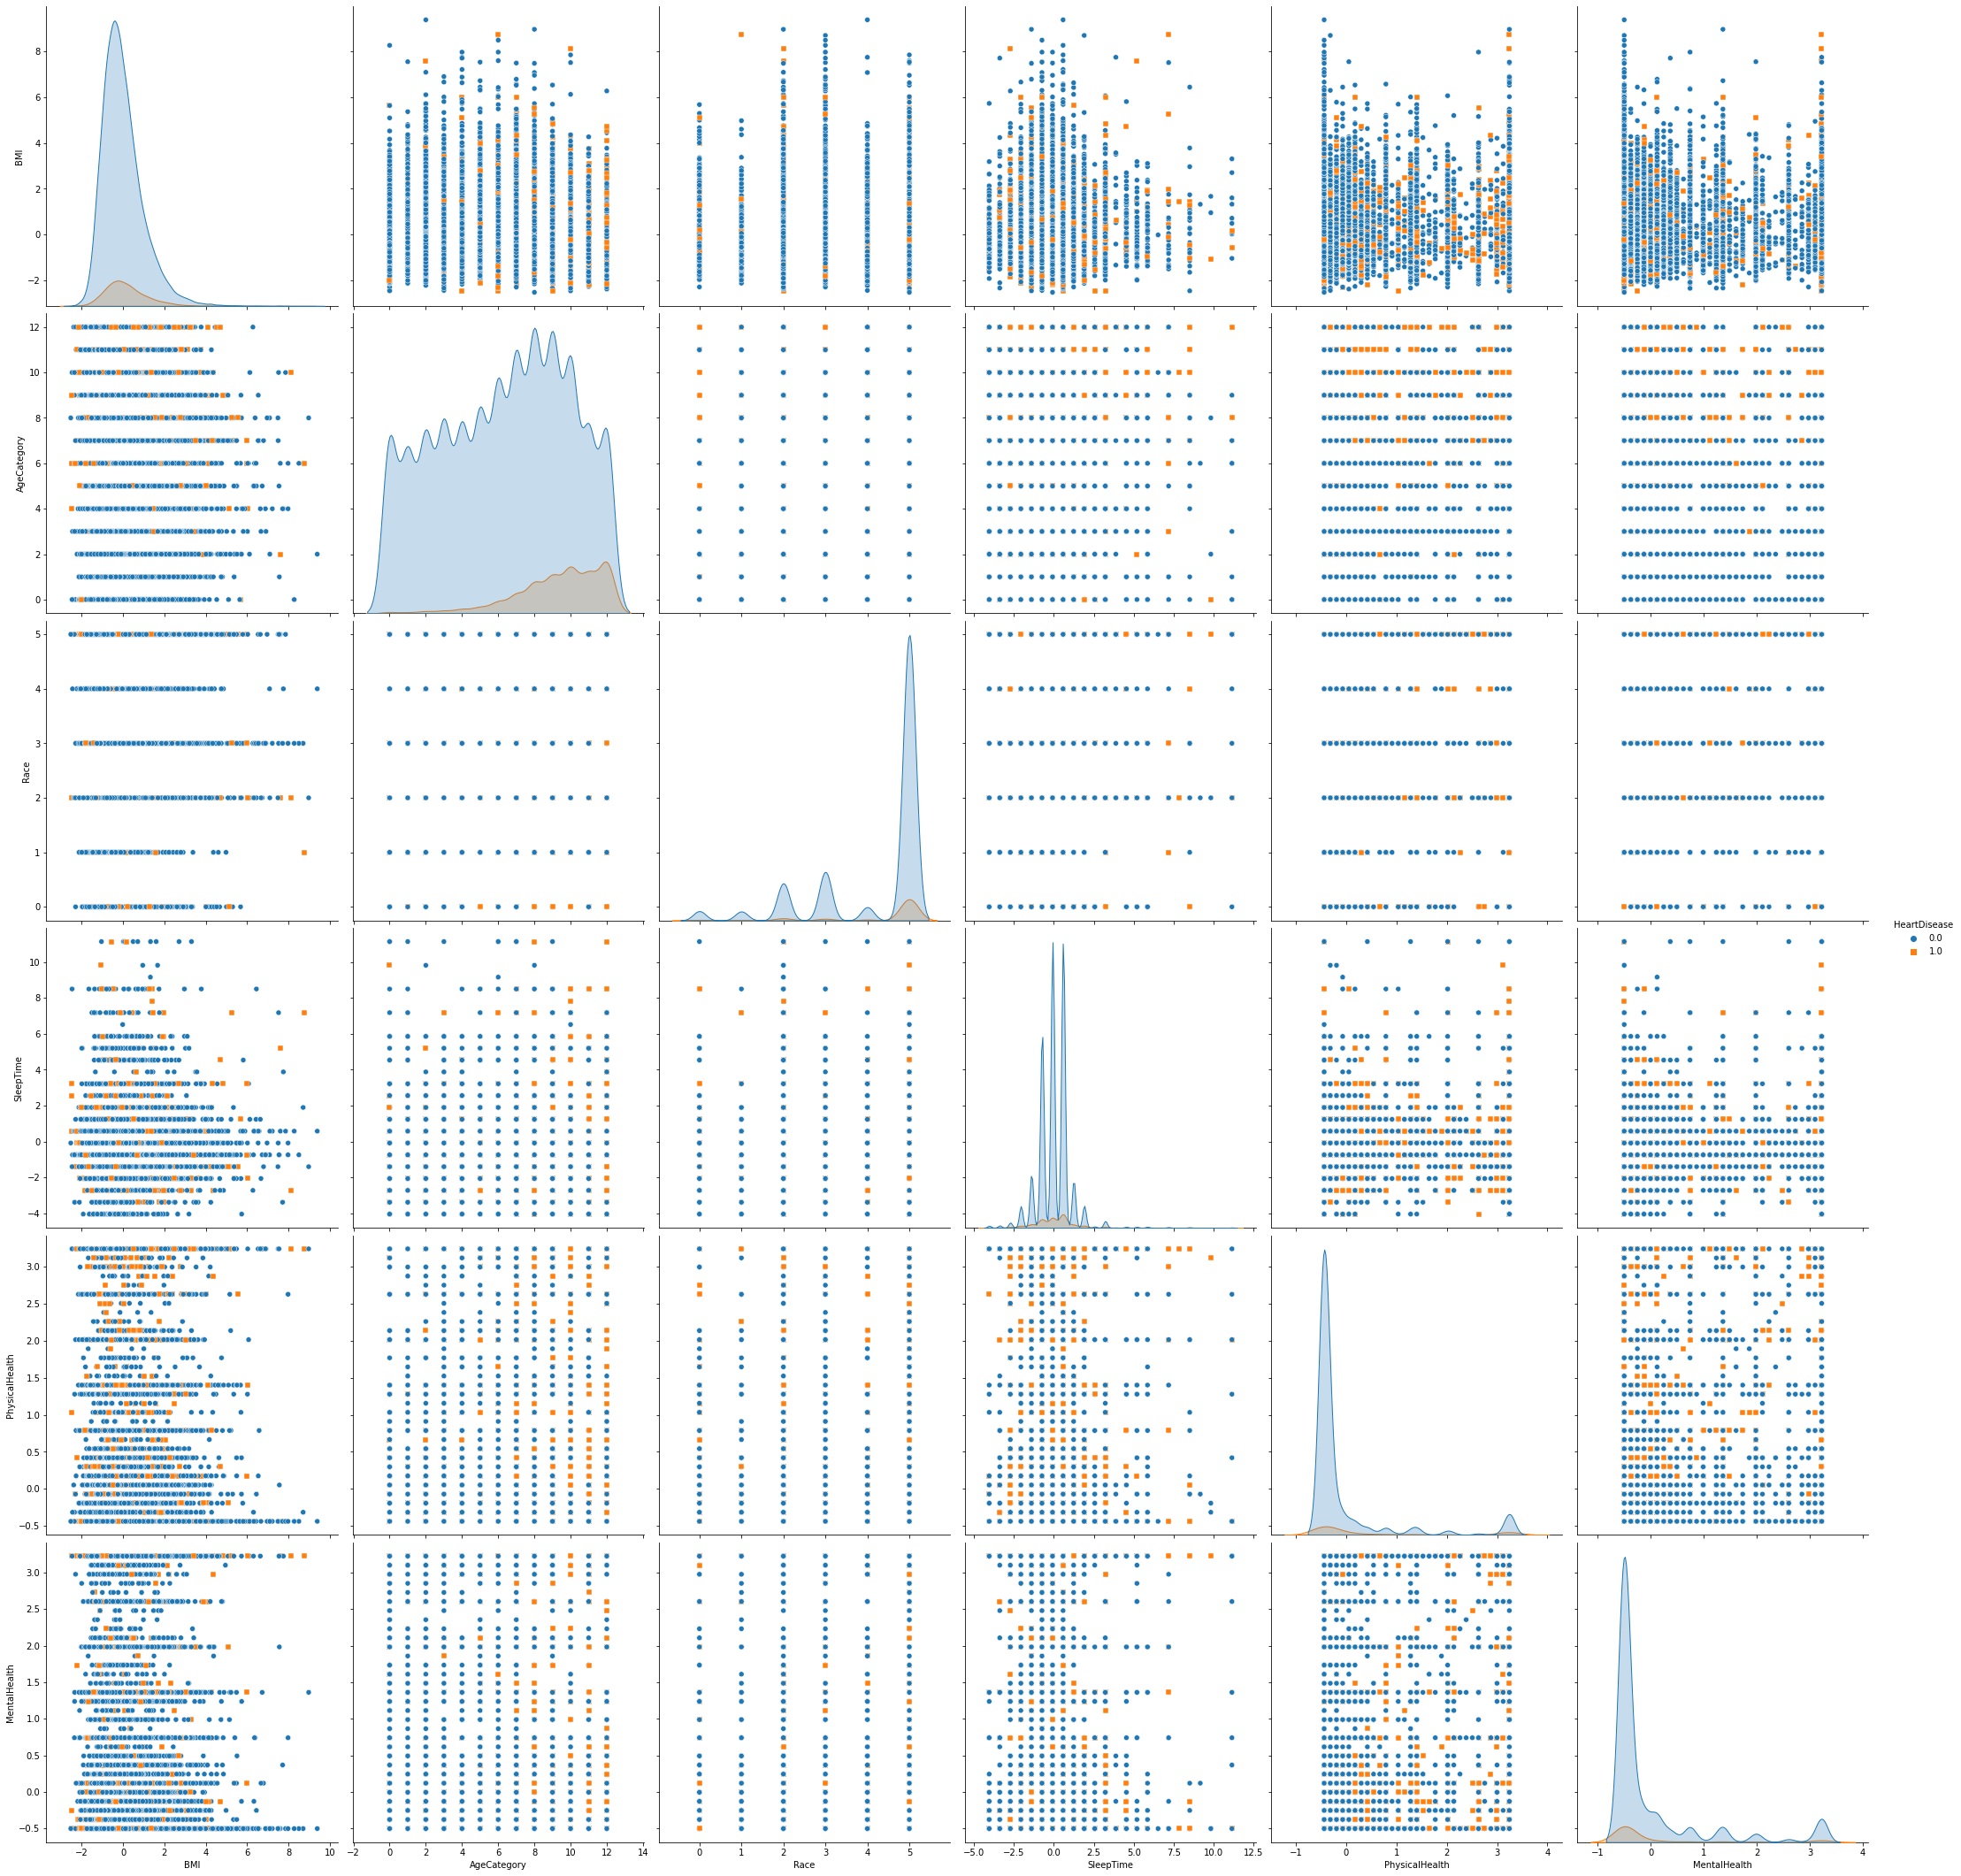

In [ ]:
# Create the correlation plot
df_hd_new = df_numeric_scaler.copy()
sns.pairplot(df_hd_new[["HeartDisease", "BMI", "AgeCategory", "Race", "SleepTime", "PhysicalHealth", "MentalHealth"]], hue="HeartDisease", markers = ["o", "s"], height =5)
# Show the plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53005 entries, 0 to 53004
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      53005 non-null  float64
 1   AgeCategory       53005 non-null  float64
 2   Race              53005 non-null  float64
 3   PhysicalActivity  53005 non-null  float64
 4   BMI               53005 non-null  float64
 5   PhysicalHealth    53005 non-null  float64
 6   MentalHealth      53005 non-null  float64
 7   SleepTime         53005 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


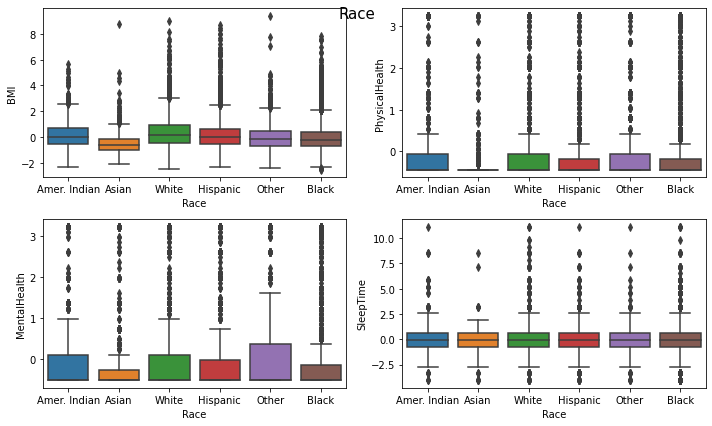

In [ ]:
def draw_box_plot(x_axis_feature):
    position_axes = [(0,0), (0,1), (1,0), (1,1)]
    fig, axes = plt.subplots(2,2, figsize=(10,6))
    for position, feature in zip(position_axes, num_features):
        sns.boxplot(ax= axes[position],data=df_hd_new, x=x_axis_feature, y=feature)
        
        # Add x-axis labels using the set_xticklabels method
        axes[position].set_xticklabels(['Amer. Indian', 'Asian', 'White', 'Hispanic', 'Other', 'Black'])

    fig.suptitle(x_axis_feature, fontsize=15)
    fig.tight_layout()
         
    plt.show()
draw_box_plot("Race")

#These histograms show us White and American Indian tend to have higher BMI, both of which increase risk of Heart Disease. Mental Health is prevalent higher
# in American Indians, though it does not play a significant role in Heart Disease

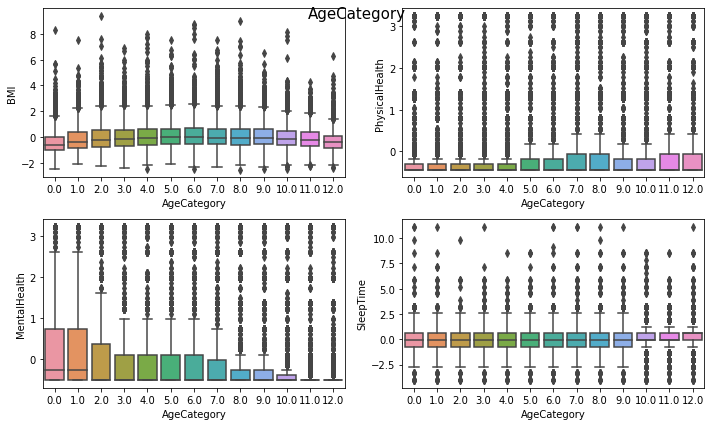

In [ ]:
def draw_box_plot(x_axis_feature):
    position_axes = [(0,0), (0,1), (1,0), (1,1)]
    fig, axes = plt.subplots(2,2, figsize=(10,6))
    for position, feature in zip(position_axes, num_features):
        sns.boxplot(ax= axes[position],data=df_hd_new, x=x_axis_feature, y=feature)
        
    fig.suptitle(x_axis_feature, fontsize=15)
    fig.tight_layout()
draw_box_plot("AgeCategory")

#Looking at the graph below,we can see that their is a decline in Mental Health as one Ages. The reverse holds true
#with Physical health

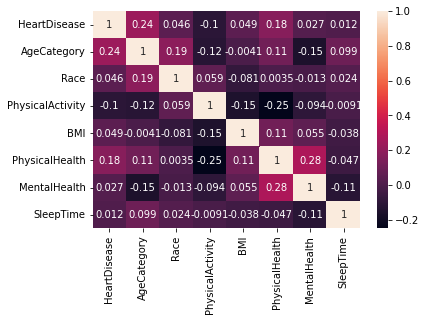

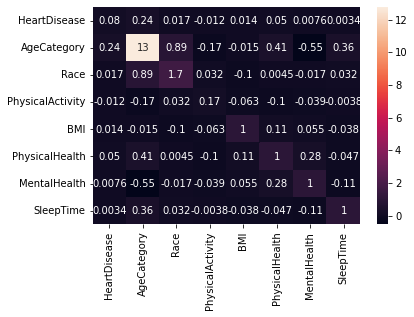

In [ ]:
corr_matrix = df_numeric_scaler.corr()
cov_matrix = df_numeric_scaler.cov()
sns.heatmap(corr_matrix, annot=True)
plt.show()
sns.heatmap(cov_matrix, annot=True)
plt.show()


#The charts down below tells us that the their is a correlation with Age and Heart Disease, as you get older it is more prevalent
#Physical Activity limitations increases Heart disease

# Step 6: Comparing different models 

In [ ]:
#Create training set for logisitc regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#sns.pairplot(df_hd_new[["HeartDisease", "BMI", "AgeCategory", "Race", "SleepTime", "PhysicalHealth", "MentalHealth"]], hue="HeartDisease
X = df_numeric_scaler[["BMI", "AgeCategory", "Race", "SleepTime", "PhysicalHealth", "MentalHealth"]]
y = df_numeric_scaler["HeartDisease"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
logistic_regression = LinearRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test data
logRegression_accuracy = logistic_regression.score(X_test, y_test)
print("Logisitic Regression Accuracy:", logRegression_accuracy)

# Use the model to make predictions
logRegression_predictions = logistic_regression.predict(X_test)
print("Logisitic Regression Predictions:", logRegression_predictions)


Logisitic Regression Accuracy: 0.07938214549343825
Logisitic Regression Predictions: [0.18326482 0.15483386 0.08084709 ... 0.02485731 0.08627578 0.03725761]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create the MLP classifier model
mlp_classifier = MLPClassifier()

# Train the model on the training data
mlp_classifier.fit(X_train, y_train)
# Evaluate the models on the test data
mlp_classifier_accuracy = accuracy_score(y_test, mlp_classifier.predict(X_test))

In [ ]:
# Print the results
print("Logistic Regression Accuracy:", logRegression_accuracy)
print("MLP Classifier Accuracy:", mlp_classifier_accuracy)

Logistic Regression Accuracy: 0.07378809706018019
MLP Classifier Accuracy: 0.9170832940288652


In [ ]:
#used to aid in comparison for converting them to binary arrays
from sklearn.preprocessing import LabelBinarizer
from numpy import where

# Convert continuous predictions to binary labels
y_pred_binary_logReg = where(logistic_regression.predict(X_test) > 0.1, 1, 0)
y_pred_binary_MLP = where(mlp_classifier.predict(X_test) > 0.1, 1, 0)

lb = LabelBinarizer()
y_true_binary = lb.fit_transform(y_test)
y_pred_binary_logReg = lb.fit_transform(y_pred_binary_logReg)
y_pred_binary_MLP = lb.fit_transform(y_pred_binary_MLP)

#Comparing f1 precision of the models
logRegression_f1 = f1_score(y_true_binary, y_pred_binary_logReg)
mlp_f1 = f1_score(y_true_binary, y_pred_binary_MLP)
 

print("Logistic Regression F1:", logRegression_f1)
print("MLP F1: ",mlp_f1)

Logistic Regression F1: 0.2686193963207716
MLP F1:  0.004530011325028312


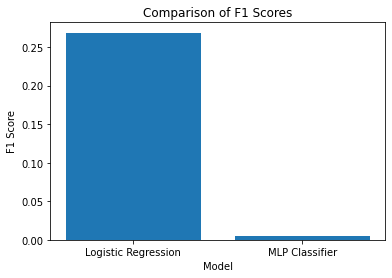

In [ ]:
# Create a bar chart to compare the F1 score of the models
models = ["Logistic Regression", "MLP Classifier"]
f1_scores = [logRegression_f1, mlp_f1]

# Plot the bar chart
plt.bar(models, f1_scores)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Scores")
plt.show()

#Logistoc Regression F1 score was higher by factor of 10 when doing comparison

In [ ]:
from sklearn.metrics import mean_squared_error
linear_regression_mse = mean_squared_error(y_test, logistic_regression.predict(X_test))
mlp_mse = mean_squared_error(y_test, mlp_classifier.predict(X_test))
print("Logistic Regression MSE:", linear_regression_mse)
print("MLP MSE:", mlp_mse)

Logistic Regression MSE: 0.07050343944500674
MLP MSE: 0.0829167059711348


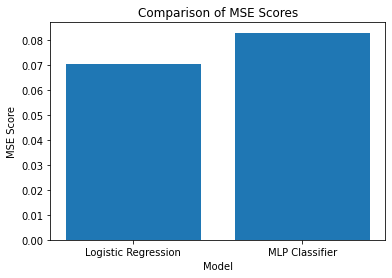

In [ ]:
# Create a bar chart to compare the MSE score of the models
models = ["Logistic Regression", "MLP Classifier"]
mse_scores = [linear_regression_mse, mlp_mse]

# Plot the bar chart
plt.bar(models, mse_scores)
plt.xlabel("Model")
plt.ylabel("MSE Score")
plt.title("Comparison of MSE Scores")
plt.show()

#Similar results for MSE comparison

# Step 7: Unsupervised + Supervised Learning

Using KMeans 

In [ ]:
# Use KMeans to group the data into clusters
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X = df_numeric_scaler[["BMI", "AgeCategory", "Race", "SleepTime", "PhysicalHealth", "MentalHealth"]]
y = df_numeric_scaler["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

# Use the clusters to predict the labels for the test data
y_pred = kmeans.predict(X_test)

# Use linear regression to fit a model on the training data for each cluster
linear_regression = LinearRegression()

# Use KNeighborsClassifier to fit a model on the training data for each cluster
knn = KNeighborsClassifier(n_neighbors=10)

# Create a dictionary to store the models for each cluster
linReg_models = {}

knn_models = {}

# Create empty lists to store the predictions made by the linear regression models
linReg_predictions = []
knn_predictions = []

for cluster in range(4):
    # Select the rows in the training data belonging to the cluster
    X_train_cluster = X_train[kmeans.labels_ == cluster]
    y_train_cluster = y_train[kmeans.labels_ == cluster]

    # Fit a linear regression model on the data for the cluster
    linear_regression.fit(X_train_cluster, y_train_cluster)

    # Fit a KNN model on the data for the cluster
    knn.fit(X_train_cluster, y_train_cluster)

    # Store the Linear Regression model in the dictionary
    linReg_models[cluster] = linear_regression
    
    # Store the KNN model in the dictionary
    knn_models[cluster] = knn

    # Select the rows in the test data belonging to the cluster
    X_test_cluster = X_test[y_pred == cluster]

    # Use the models for the cluster to make predictions on the test data
    linReg_cluster_predictions = linReg_models[cluster].predict(X_test_cluster)
    knn_cluster_predictions = knn_models[cluster].predict(X_test_cluster)

    # Add the predictions to the list of predictions
    linReg_predictions.append(linReg_cluster_predictions)
    knn_predictions.append(knn_cluster_predictions)
# Use the numpy.concatenate function to combine the predictions made by the linear regression models
y_pred_lingReg = np.concatenate(linReg_predictions)
y_pred_knn = np.concatenate(knn_predictions)

# Evaluate the performance of the ensemble model using mean squared error
ensemble_mse1 = mean_squared_error(y_test, y_pred_lingReg)
print("Ensemble MSE with Linear Regression:", ensemble_mse1)   

ensemble_mse2 = mean_squared_error(y_test, y_pred_knn)
print("Ensemble MSE with KNearest Neighbor:", ensemble_mse2)  



Ensemble MSE with Linear Regression: 0.08705923716293845
Ensemble MSE with KNearest Neighbor: 0.09178379398169983


In [ ]:
# Compute the f1 score for the ensemble model using linear regression
ensemble_f1_KNN = f1_score(y_test, y_pred_knn)

# Print the f1 score
print("Ensemble f1 score (KNN)):", ensemble_f1_KNN)

Ensemble f1 score (KNN)): 0.008154943934760447


# Conclusion


Based on the results of the project, it appears that the MLP Classifier performed better than the Logistic Regression model in terms of accuracy and F1 score. The KNN Ensemble model performed the worst in terms of MSE, but it is important to note that the MSE metric is not always the best way to evaluate the performance of a classification model.

One possible explanation for the better performance of the MLP Classifier could be the fact that it is a more complex model that is capable of capturing non-linear relationships between the features and the label. In contrast, the Logistic Regression model is a relatively simple model that assumes a linear relationship between the features and the label.

Based on these results, I would recommend using the MLP Classifier model for predicting heart disease, as it performed the best in terms of both accuracy and F1 score. Additionally, it is important to consider the SleepTime and MentalHealth features when building the model, as they appear to be the most important for predicting heart disease.

To answer the problem statement, it appears the optimal sleep time and mental health did not have a strong correlation with heart disease. Optimal sleep time is 6.517 hours to avoid heart disease. While Mental Health is 2.36 (out of 4) for good standing. 

Throughout this course, I learned how to preprocess data, train and evaluate different models, and select the best model for a given dataset. I also learned how to apply unsupervised and supervised techniques to improve the performance of my models. Overall, this course has given me a strong foundation in applying these techniques to real-world problems.




